# Capstone Project 1-



In [1]:
# Importing the required libraries and loading the dataset provided for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
creditcard_info=pd.read_csv(r"C:\Users\lenovo\Downloads\Capstone+Project+1\Credit_card.csv")
creditcard_label=pd.read_csv(r"C:\Users\lenovo\Downloads\Capstone+Project+1\Credit_card_label.csv")

In [2]:
creditcard_info.head(2)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
credit_data=pd.merge(creditcard_info,creditcard_label,on="Ind_ID",how="inner" ) #Merging the two dataset

In [4]:
print(credit_data.shape)
credit_data.isna().sum() #Gives the information of all the null values 

(1548, 19)


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [5]:
credit_data.describe() #statistical information about the data

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [6]:
credit_data.dtypes  #Displays the data type of each column

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [7]:
credit_data=credit_data.drop(["Mobile_phone","Work_Phone","Phone","EMAIL_ID","Ind_ID"],axis=1)

In [8]:
print(credit_data.shape)
credit_data=credit_data.drop_duplicates() # to remove the duplicate rows
print(credit_data)

(1548, 14)
     GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0         M         Y             Y         0       180000.0   
1         F         Y             N         0       315000.0   
2         F         Y             N         0       315000.0   
3         F         Y             N         0            NaN   
5       NaN         Y             N         0       315000.0   
...     ...       ...           ...       ...            ...   
1542      M         Y             N         1       360000.0   
1543      F         N             Y         0            NaN   
1544      F         N             N         0       225000.0   
1546      M         Y             N         0       270000.0   
1547      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate           

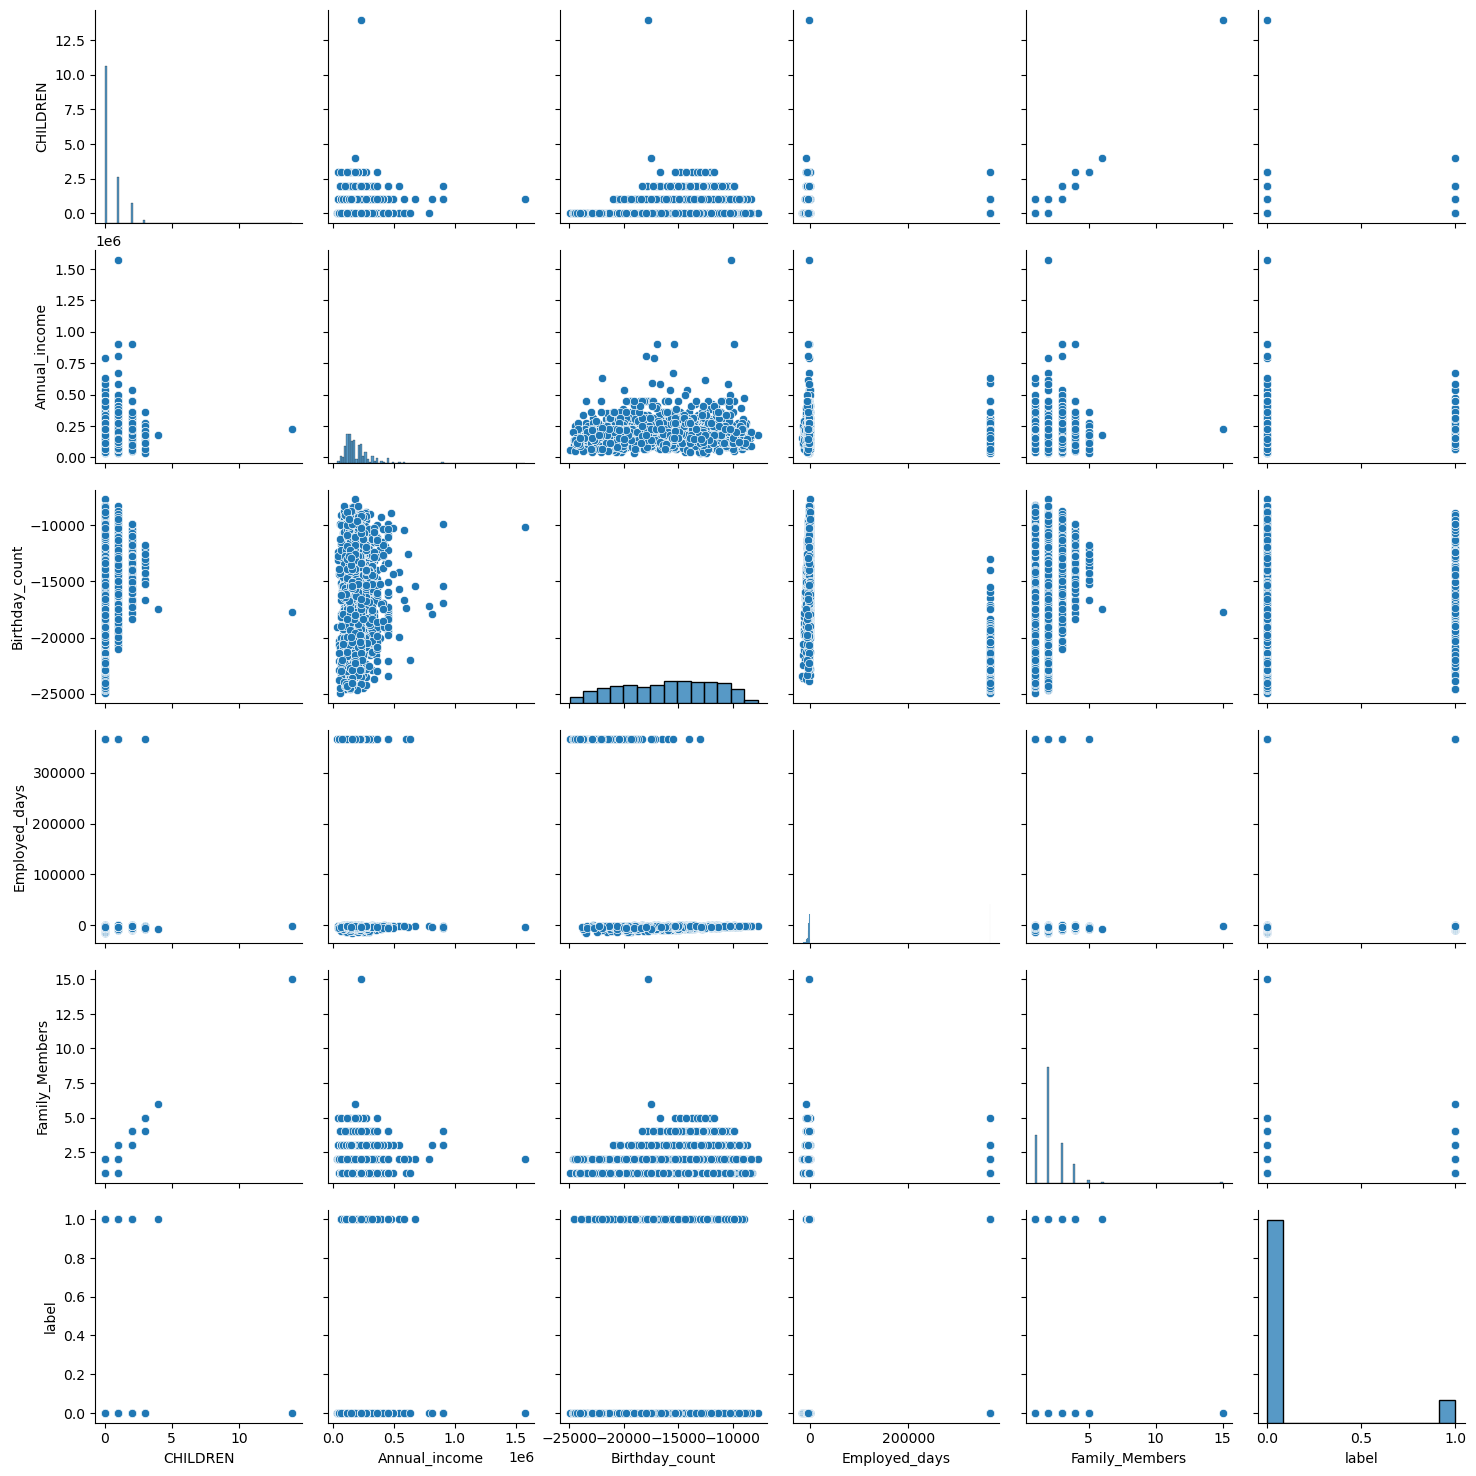

In [9]:
import seaborn as sns
sns.pairplot(credit_data)
plt.show()

In [10]:
credit_data["AGE"]=credit_data["Birthday_count"]/(-365) # Adding a new column 
credit_data=credit_data.drop(["Birthday_count"],axis=1)
credit_data.head(2)


,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Type_Occupation,Family_Members,label,AGE
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,NaN,2,1,51.430137
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,NaN,2,1,37.142466


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11384\890559484.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=credit_data.corr()


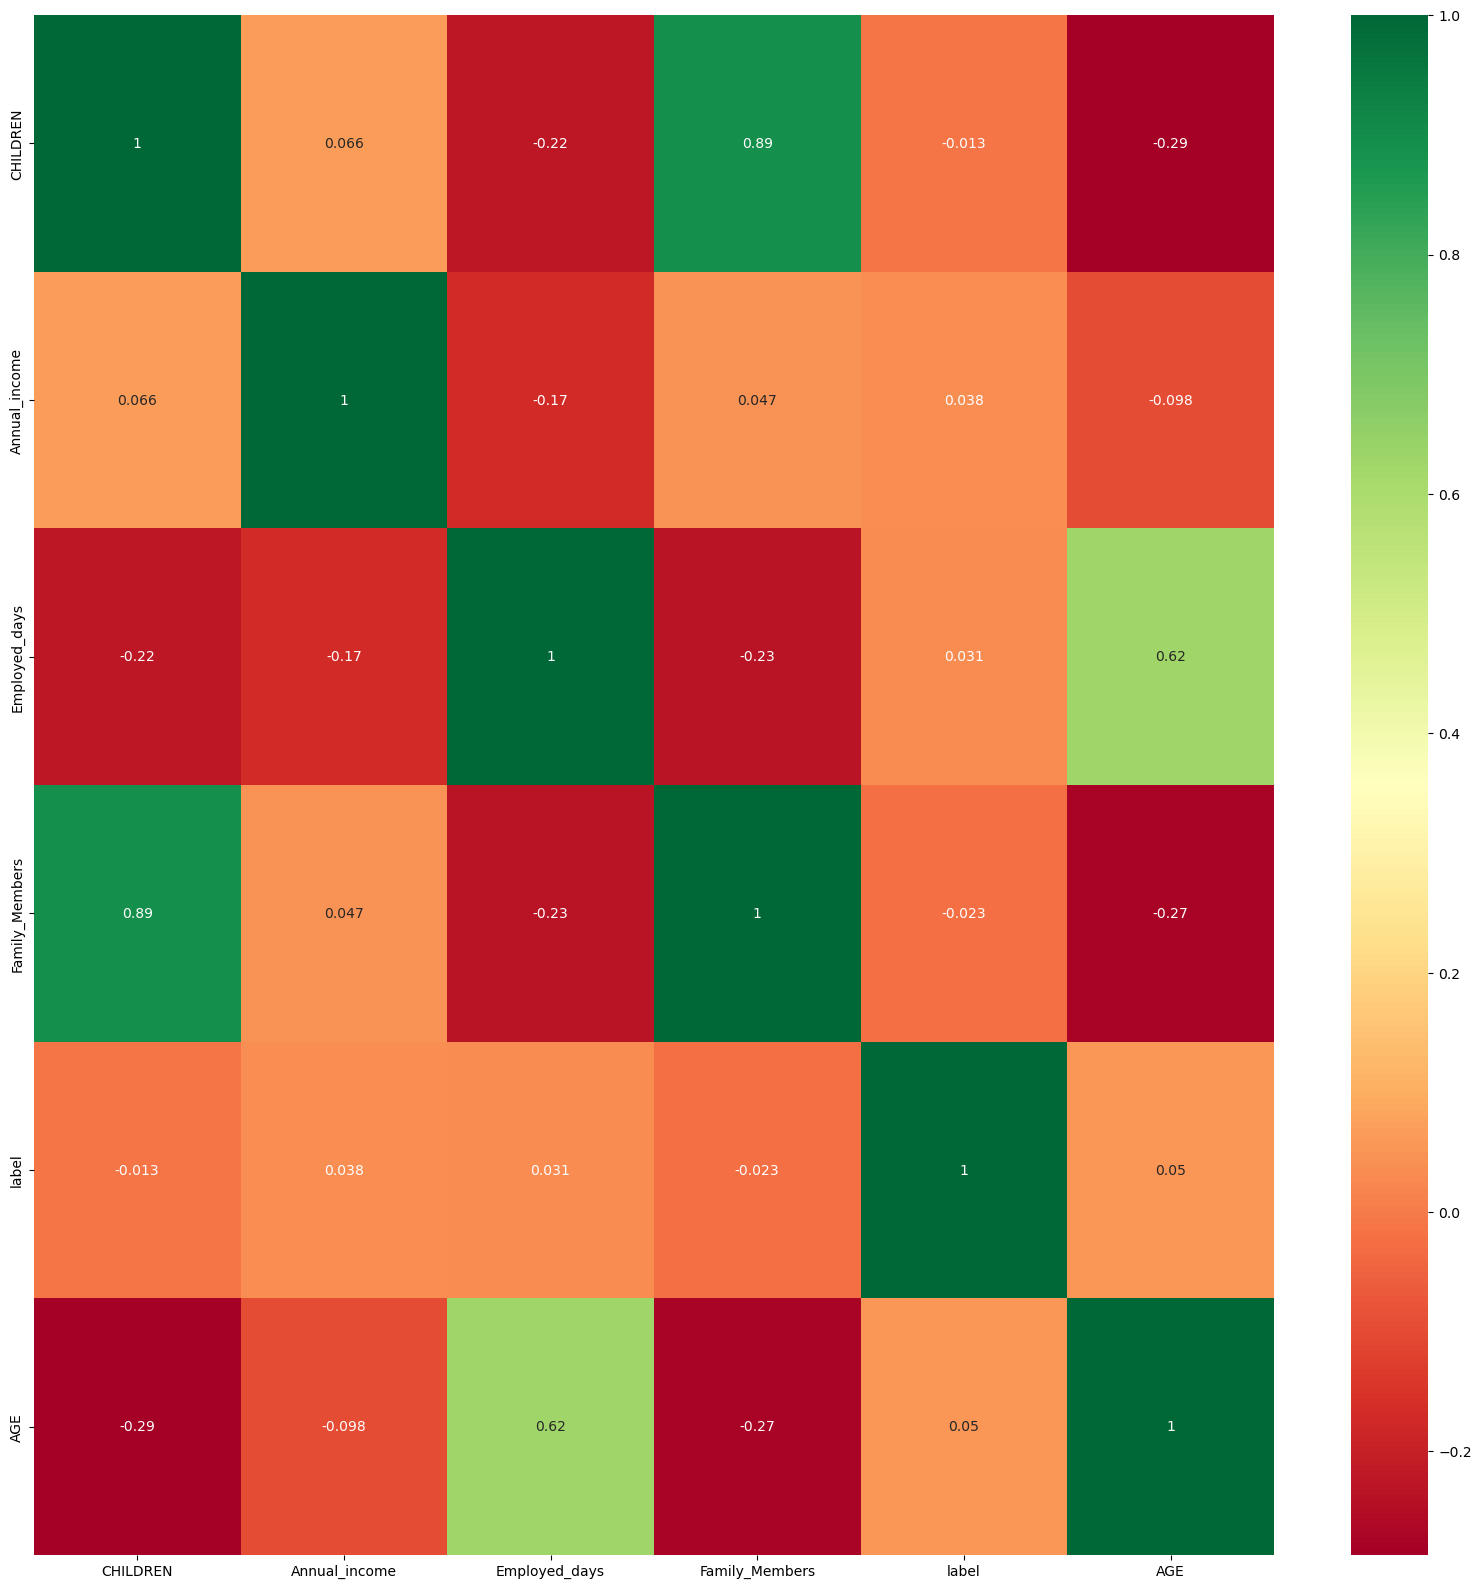

In [11]:
corrmat=credit_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(credit_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
salary_mean=credit_data["Annual_income"].mean()
gender_mode=credit_data["GENDER"].mode()
occupation_mode=credit_data["Type_Occupation"].mode()
Age_median=credit_data["AGE"].median()

In [13]:
credit_data["Annual_income"]=credit_data["Annual_income"].fillna(salary_mean) #To fill all the null values
credit_data["GENDER"]=credit_data["GENDER"].fillna(gender_mode)
credit_data["Type_Occupation"]=credit_data["Type_Occupation"].fillna(occupation_mode)
credit_data["AGE"]=credit_data["AGE"].fillna(Age_median)

In [14]:
#Using label encoding to convert categorical columns into numerical columns
from sklearn import preprocessing                               
le=preprocessing.LabelEncoder()
credit_data.GENDER=le.fit_transform(credit_data.GENDER)
credit_data.Car_Owner=le.fit_transform(credit_data.Car_Owner)
credit_data.Propert_Owner=le.fit_transform(credit_data.Propert_Owner)
credit_data.Type_Income=le.fit_transform(credit_data.Type_Income)
credit_data.EDUCATION=le.fit_transform(credit_data.EDUCATION)
credit_data.Marital_status=le.fit_transform(credit_data.Marital_status)
credit_data.Housing_type=le.fit_transform(credit_data.Housing_type)
credit_data.Type_Occupation=le.fit_transform(credit_data.Type_Occupation)
print(credit_data)
print(credit_data.shape)

      GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  Type_Income  \
0          1          1              1         0  180000.000000            1   
1          0          1              0         0  315000.000000            0   
2          0          1              0         0  315000.000000            0   
3          0          1              0         0  189478.079604            0   
5          2          1              0         0  315000.000000            1   
...      ...        ...            ...       ...            ...          ...   
1542       1          1              0         1  360000.000000            2   
1543       0          0              1         0  189478.079604            0   
1544       0          0              0         0  225000.000000            0   
1546       1          1              0         0  270000.000000            3   
1547       0          1              1         0  225000.000000            3   

      EDUCATION  Marital_status  Housin

In [15]:
credit_data.isnull().sum()

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Employed_days      0
Type_Occupation    0
Family_Members     0
label              0
AGE                0
dtype: int64

In [16]:
X=credit_data[["GENDER","Car_Owner","Propert_Owner","Annual_income",
                "Type_Income","Marital_status","Employed_days","Family_Members",
              "AGE"]]
Y=credit_data["label"] #Target variable
X.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,Marital_status,Employed_days,Family_Members,AGE
0,1,1,1,180000.000000,1,1,365243,2,51.430137
1,0,1,0,315000.000000,0,1,-586,2,37.142466
2,0,1,0,315000.000000,0,1,-586,2,42.771233
3,0,1,0,189478.079604,0,1,-586,2,37.142466
5,2,1,0,315000.000000,1,1,-586,2,37.142466


In [17]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select=5,step=1)
selector = selector.fit(X,Y)
print(selector.support_)

selector.ranking_

[ True  True  True False  True  True False False False]


array([1, 1, 1, 5, 1, 1, 4, 2, 3])

In [18]:
x=X[["GENDER","Car_Owner","Propert_Owner","Annual_income",
                "Marital_status","Employed_days"]]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,stratify=Y,random_state=42)

In [20]:
print(X.shape,x_train.shape,x_test.shape)

(1386, 9) (1108, 6) (278, 6)


# Model 1 --> Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#training the logistic Regression model with training model
model.fit(x_train,y_train)


LogisticRegression()

In [22]:
#Model Evaluation:

In [23]:
from sklearn.metrics import confusion_matrix
predict=model.predict(x_test)
pd.DataFrame(confusion_matrix(y_test,predict),columns=["Predicted No","Predicted Yes"],index=["Actual No","Actual Yes"])


,Predicted No,Predicted Yes
Actual No,251,0
Actual Yes,27,0


In [24]:
#accuracy on training data
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [25]:
print("Accuracy",training_data_accuracy)

Accuracy 0.9007220216606499


In [26]:
from sklearn.metrics import accuracy_score
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [27]:
print("Accuracy",test_data_accuracy)

Accuracy 0.9028776978417267


# Model 2--> Decision tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
 

DecisionTreeClassifier(random_state=0)

In [29]:

classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)

In [30]:
print(f"accuracy: {format(classification.score(x_train, y_train), '.4f')} ")
print(f"accuracy: {format(classification.score(x_test, y_test), '.4f')} ")

accuracy: 0.9070 
accuracy: 0.8741 


# Model3 --> Random Forest Classifier

In [31]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
accuracy=metrics.accuracy_score(y_pred,y_test)
print(accuracy)

0.8741007194244604


In [33]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[237,  14],
       [ 21,   6]], dtype=int64)

# Model4 --> Xgboost Classifier

In [34]:
#! pip install xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy=metrics.accuracy_score(y_pred,y_test)
print(accuracy)

0.8920863309352518


In [35]:
new_df=pd.DataFrame({"Models":["Logistic Regression","Decision tree classifier","Random forest classifier","Xgboost classifier"],"Accuracy":[90,87,86,89]})
print(new_df)

                     Models  Accuracy
0       Logistic Regression        90
1  Decision tree classifier        87
2  Random forest classifier        86
3        Xgboost classifier        89


# From above result, Logistic regression will give better accuracy than the rest of the other models I have used above.

In [36]:
credit_card_data=pd.read_csv(r"C:\Users\lenovo\Downloads\Capstone+Project+1\Credit_card.csv")
credit_card_data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [37]:
credit_card_label=pd.read_csv(r"C:\Users\lenovo\Downloads\Capstone+Project+1\Credit_card_label.csv")

credit_card_label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [38]:
import pandas as pd
credit_info=pd.merge(credit_card_data,credit_card_label,on="Ind_ID",how="inner")
credit_info=credit_info.drop_duplicates()

In [39]:
salary_mean=credit_info["Annual_income"].mean()
gender_mode=credit_info["GENDER"].mode()
occupation_mode=credit_info["Type_Occupation"].mode()

In [40]:
credit_info["Annual_income"]=credit_info["Annual_income"].fillna(salary_mean) # filling the null values
credit_info["GENDER"]=credit_info["GENDER"].fillna(gender_mode)
credit_info["Type_Occupation"]=credit_info["Type_Occupation"].fillna(occupation_mode)

In [41]:
credit_info["AGE"]=credit_info["Birthday_count"]/(-365)
credit_info=credit_info.drop(["Birthday_count"],axis=1)

In [42]:
credit_info.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,0,Laborers,2,1,51.430137
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,NaN,2,1,37.142466
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,NaN,2,1,NaN
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,NaN,2,1,37.142466
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-586,1,1,1,0,NaN,2,1,37.142466


# A few questions need to be answered by using SQL:

Q1.Find the female owners of cars and property.

Q2. Find the male customers who are staying with their families.

Q3. Please list the top five people having the highest income.

Q4. How many married people are having bad credit?

Q5. What is the highest education level and what is the total count?

Q6. Between married males and females, who is having more bad credit? 

In [43]:
#! pip install duckdb
import duckdb
conn=duckdb.connect()
conn.register("credit_info",credit_info)
result=conn.execute("SELECT * from credit_info where gender='F' and Car_Owner='Y' and Propert_Owner='Y' ").fetchdf()
result

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE
0,5018498,F,Y,Y,0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,-1002,1,1,1,0,Cooking staff,2,1,51.917808
1,5018501,F,Y,Y,0,191399.32623,Working,Secondary / secondary special,Married,House / apartment,-1002,1,1,1,0,Cooking staff,2,1,51.917808
2,5018503,F,Y,Y,0,90000.00000,Working,Secondary / secondary special,Married,House / apartment,-1002,1,1,1,0,Cooking staff,2,1,51.917808
3,5024213,F,Y,Y,0,540000.00000,Commercial associate,Higher education,Married,House / apartment,-185,1,0,1,0,None,2,1,43.019178
4,5036660,F,Y,Y,0,76500.00000,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,0,0,None,2,1,65.301370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5048458,F,Y,Y,1,126000.00000,Working,Higher education,Married,House / apartment,-157,1,0,0,0,None,3,0,25.865753
173,5023719,F,Y,Y,0,175500.00000,Pensioner,Higher education,Married,House / apartment,365243,1,0,1,0,None,2,0,60.484932
174,5033520,F,Y,Y,3,180000.00000,Working,Secondary / secondary special,Married,Municipal apartment,-5862,1,0,1,0,Medicine staff,5,0,34.408219
175,5024049,F,Y,Y,1,144000.00000,Working,Higher education,Married,House / apartment,-2924,1,0,0,0,Accountants,3,0,35.350685


In [44]:
#Group the customers based on their income type and find the average of their annual income.
result1=conn.execute("select Type_Income,round(avg(Annual_income),2) as average_salary from credit_info group by Type_Income").fetchdf()
print(result1)

            Type_Income  average_salary
0             Pensioner       155713.75
1               Working       181191.43
2         State servant       211422.41
3  Commercial associate       233653.14


In [45]:
#Find the male customers who are staying with their families.
result2=conn.execute("select * from credit_info where gender='M' and family_members>1").fetchdf()
result2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,0,Laborers,2,1,51.430137
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-678,1,0,1,1,Core staff,3,1,49.789041
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-678,1,0,1,1,Core staff,3,1,49.789041
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-913,1,0,0,1,None,3,1,24.402740
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-248,1,0,0,0,Laborers,2,1,46.290411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-3476,1,0,0,0,Drivers,2,0,49.246575
466,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1436,1,0,0,0,Low-skill Laborers,2,0,36.536986
467,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-3536,1,0,1,0,Drivers,3,0,30.942466
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-2477,1,0,0,0,Managers,4,0,36.093151


In [46]:
#Please list the top five people having the highest income.
result3=conn.execute("select * from credit_info order by annual_income desc limit 5").fetchdf()
result3

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,AGE
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-2479,1,0,0,0,Managers,2,0,27.786301
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-2479,1,0,0,0,Managers,2,0,27.786301
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,-4509,1,0,0,0,Laborers,3,0,42.136986
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-1000,1,0,0,0,Managers,4,0,27.093151
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-1000,1,0,0,0,Managers,4,0,27.093151


In [47]:
#How many married people are having bad credit?
result4=conn.execute("select count(*) as No_of_married_people_having_bad_credit from (select * from credit_info where marital_status='Married' and label=1)ss group by marital_status").fetchdf()
result4

,No_of_married_people_having_bad_credit
0,114


In [48]:
#What is the highest education level and what is the total count?
result5=conn.execute("select * from (select education,count(*) as count_of_students from credit_info group by education)ss where education ='Higher education' ").fetchdf()
result5

,EDUCATION,count_of_students
0,Higher education,426


In [54]:
#Between married males and females, who is having more bad credit?
result6=conn.execute("select gender,count(*) as No_of_bad_credit from (select * from credit_info where marital_status='Married' and label=1)ss group by gender").fetchdf()
result6

,GENDER,No_of_bad_credit
0,None,4
1,M,51
2,F,59
